In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Display information about the dataset
print(titanic_data.info())

# Handling missing values

# Check for missing values
print("Missing values before handling:")
print(titanic_data.isnull().sum())

# Impute missing values for 'Age' with the median age
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' with the most common port 'S'
titanic_data['Embarked'].fillna('S', inplace=True)

# Drop 'Cabin' column due to a large number of missing values
titanic_data.drop('Cabin', axis=1, inplace=True)

# Check missing values after handling
print("\nMissing values after handling:")
print(titanic_data.isnull().sum())

# Encoding categorical variables

# Convert 'Sex' into numerical values (0 for male, 1 for female)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked' column
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Display the first few rows after preprocessing
print("\nFirst few rows after preprocessing:")
print(titanic_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Sib

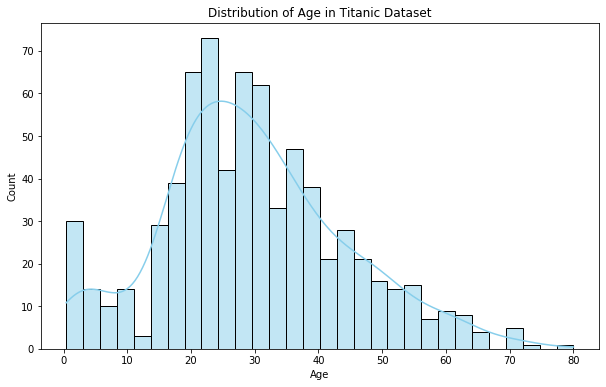

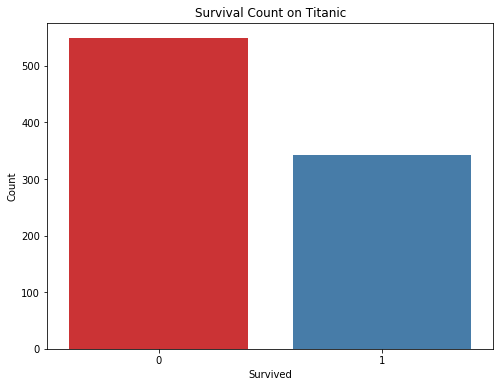

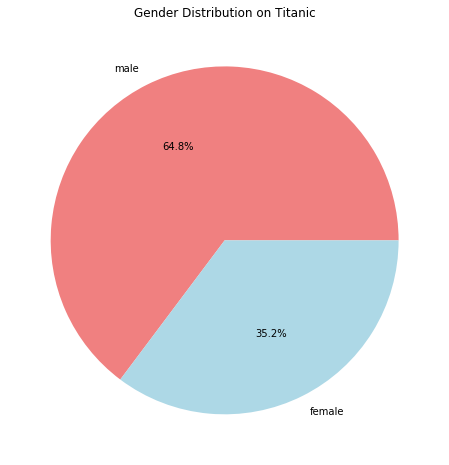

In [5]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Histogram of Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Bar chart of survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_data, palette='Set1')
plt.title('Survival Count on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Pie chart of gender distribution
gender_counts = titanic_data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution on Titanic')
plt.show()


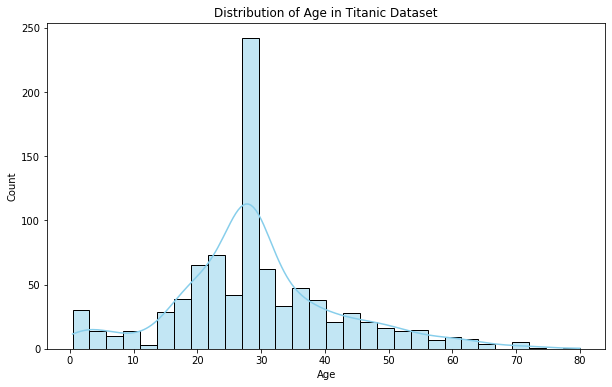

In [2]:
# Histogram of Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

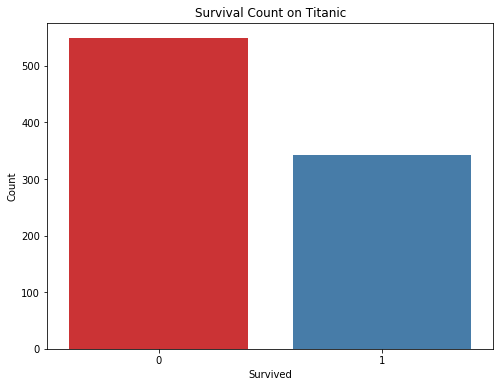

In [3]:
# Bar chart of survival count
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_data, palette='Set1')
plt.title('Survival Count on Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

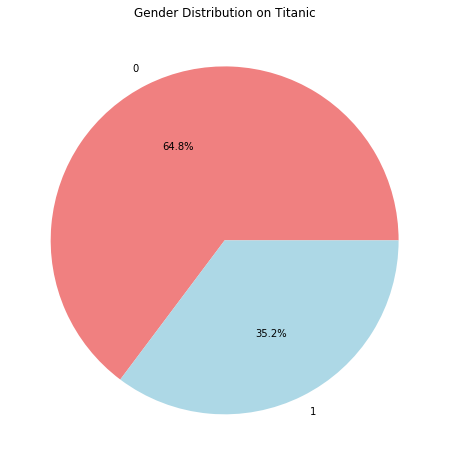

In [4]:
# Pie chart of gender distribution
gender_counts = titanic_data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution on Titanic')
plt.show()

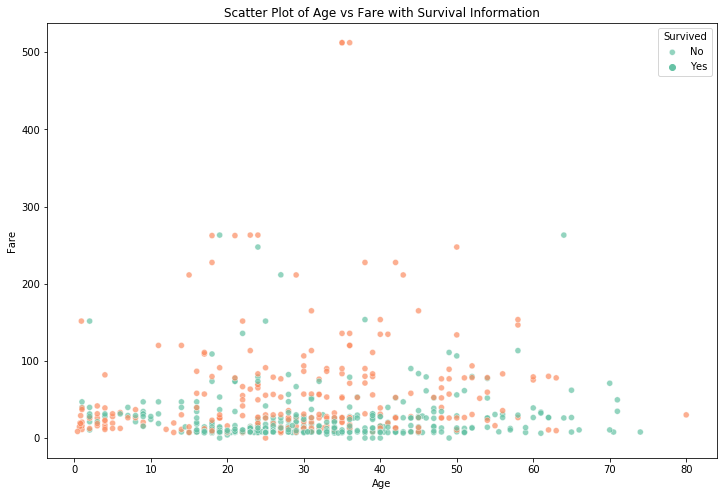

In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Scatter plot of Age vs Fare with survival information
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_data, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Age vs Fare with Survival Information')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Exclude non-numeric columns and the target variable 'Survived' for X
X = titanic_data.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Convert 'Sex' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

# Use 'Survived' as the target variable for y
y = titanic_data['Survived']

# Impute missing values in X with the mean
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[93 12]
 [20 54]]


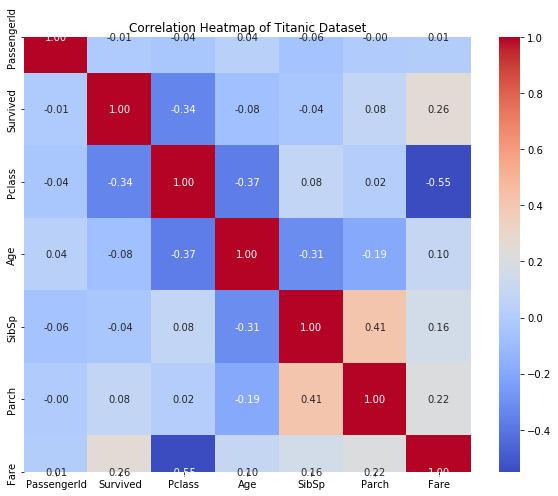

In [23]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

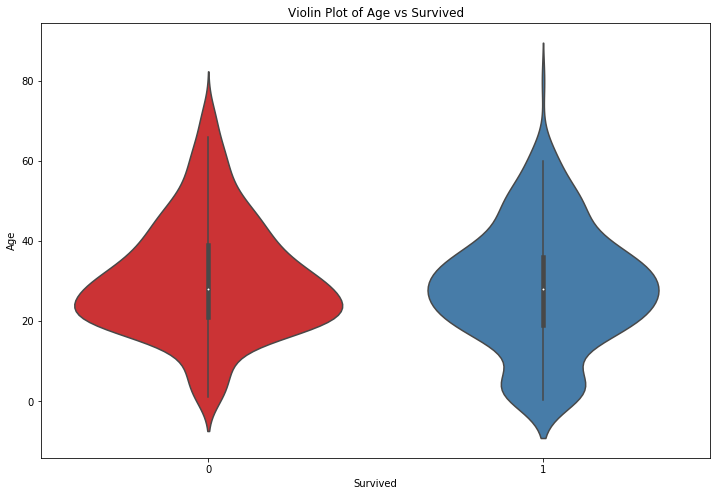

In [24]:
# Violin Plot (example for 'Age' and 'Survived')
plt.figure(figsize=(12, 8))
sns.violinplot(x='Survived', y='Age', data=titanic_data, palette='Set1')
plt.title('Violin Plot of Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()